In \[1\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import GridSearchCV

In \[2\]:

    df = pd.read_csv('parkinsons.data')
    df

Out\[2\]:

|     | name           | MDVP:Fo(Hz) | MDVP:Fhi(Hz) | MDVP:Flo(Hz) | MDVP:Jitter(%) | MDVP:Jitter(Abs) | MDVP:RAP | MDVP:PPQ | Jitter:DDP | MDVP:Shimmer | ... | Shimmer:DDA | NHR     | HNR    | status | RPDE     | DFA      | spread1   | spread2  | D2       | PPE      |
|-----|----------------|-------------|--------------|--------------|----------------|------------------|----------|----------|------------|--------------|-----|-------------|---------|--------|--------|----------|----------|-----------|----------|----------|----------|
| 0   | phon_R01_S01_1 | 119.992     | 157.302      | 74.997       | 0.00784        | 0.00007          | 0.00370  | 0.00554  | 0.01109    | 0.04374      | ... | 0.06545     | 0.02211 | 21.033 | 1      | 0.414783 | 0.815285 | -4.813031 | 0.266482 | 2.301442 | 0.284654 |
| 1   | phon_R01_S01_2 | 122.400     | 148.650      | 113.819      | 0.00968        | 0.00008          | 0.00465  | 0.00696  | 0.01394    | 0.06134      | ... | 0.09403     | 0.01929 | 19.085 | 1      | 0.458359 | 0.819521 | -4.075192 | 0.335590 | 2.486855 | 0.368674 |
| 2   | phon_R01_S01_3 | 116.682     | 131.111      | 111.555      | 0.01050        | 0.00009          | 0.00544  | 0.00781  | 0.01633    | 0.05233      | ... | 0.08270     | 0.01309 | 20.651 | 1      | 0.429895 | 0.825288 | -4.443179 | 0.311173 | 2.342259 | 0.332634 |
| 3   | phon_R01_S01_4 | 116.676     | 137.871      | 111.366      | 0.00997        | 0.00009          | 0.00502  | 0.00698  | 0.01505    | 0.05492      | ... | 0.08771     | 0.01353 | 20.644 | 1      | 0.434969 | 0.819235 | -4.117501 | 0.334147 | 2.405554 | 0.368975 |
| 4   | phon_R01_S01_5 | 116.014     | 141.781      | 110.655      | 0.01284        | 0.00011          | 0.00655  | 0.00908  | 0.01966    | 0.06425      | ... | 0.10470     | 0.01767 | 19.649 | 1      | 0.417356 | 0.823484 | -3.747787 | 0.234513 | 2.332180 | 0.410335 |
| ... | ...            | ...         | ...          | ...          | ...            | ...              | ...      | ...      | ...        | ...          | ... | ...         | ...     | ...    | ...    | ...      | ...      | ...       | ...      | ...      | ...      |
| 190 | phon_R01_S50_2 | 174.188     | 230.978      | 94.261       | 0.00459        | 0.00003          | 0.00263  | 0.00259  | 0.00790    | 0.04087      | ... | 0.07008     | 0.02764 | 19.517 | 0      | 0.448439 | 0.657899 | -6.538586 | 0.121952 | 2.657476 | 0.133050 |
| 191 | phon_R01_S50_3 | 209.516     | 253.017      | 89.488       | 0.00564        | 0.00003          | 0.00331  | 0.00292  | 0.00994    | 0.02751      | ... | 0.04812     | 0.01810 | 19.147 | 0      | 0.431674 | 0.683244 | -6.195325 | 0.129303 | 2.784312 | 0.168895 |
| 192 | phon_R01_S50_4 | 174.688     | 240.005      | 74.287       | 0.01360        | 0.00008          | 0.00624  | 0.00564  | 0.01873    | 0.02308      | ... | 0.03804     | 0.10715 | 17.883 | 0      | 0.407567 | 0.655683 | -6.787197 | 0.158453 | 2.679772 | 0.131728 |
| 193 | phon_R01_S50_5 | 198.764     | 396.961      | 74.904       | 0.00740        | 0.00004          | 0.00370  | 0.00390  | 0.01109    | 0.02296      | ... | 0.03794     | 0.07223 | 19.020 | 0      | 0.451221 | 0.643956 | -6.744577 | 0.207454 | 2.138608 | 0.123306 |
| 194 | phon_R01_S50_6 | 214.289     | 260.277      | 77.973       | 0.00567        | 0.00003          | 0.00295  | 0.00317  | 0.00885    | 0.01884      | ... | 0.03078     | 0.04398 | 21.209 | 0      | 0.462803 | 0.664357 | -5.724056 | 0.190667 | 2.555477 | 0.148569 |

195 rows × 24 columns

In \[3\]:

    df.isna().sum()

Out\[3\]:

    name                0
    MDVP:Fo(Hz)         0
    MDVP:Fhi(Hz)        0
    MDVP:Flo(Hz)        0
    MDVP:Jitter(%)      0
    MDVP:Jitter(Abs)    0
    MDVP:RAP            0
    MDVP:PPQ            0
    Jitter:DDP          0
    MDVP:Shimmer        0
    MDVP:Shimmer(dB)    0
    Shimmer:APQ3        0
    Shimmer:APQ5        0
    MDVP:APQ            0
    Shimmer:DDA         0
    NHR                 0
    HNR                 0
    status              0
    RPDE                0
    DFA                 0
    spread1             0
    spread2             0
    D2                  0
    PPE                 0
    dtype: int64

## Section A<a href="#Section-A" class="anchor-link">¶</a>

### Train and test data splitting<a href="#Train-and-test-data-splitting" class="anchor-link">¶</a>

In \[4\]:

    from sklearn.model_selection import train_test_split

In \[5\]:

    x = df.drop(['name','status'], axis= 1)
    y= df['status']

In \[6\]:

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)

## Section B<a href="#Section-B" class="anchor-link">¶</a>

### Finding optimal pruning parameter<a href="#Finding-optimal-pruning-parameter" class="anchor-link">¶</a>

In \[7\]:

    from sklearn.tree import DecisionTreeClassifier
    from sklearn import tree
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import cross_val_score

In \[8\]:

    tree_alpha = DecisionTreeClassifier(criterion = 'entropy', random_state=3)
    tree_alpha.fit(x_train,y_train)
    y_train_pred = tree_alpha.predict(x_train)
    y_test_pred = tree_alpha.predict(x_test)

In \[9\]:

    path = tree_alpha.cost_complexity_pruning_path(x_train,y_train)
    alphas = path['ccp_alphas']

In \[10\]:

    alphas

Out\[10\]:

    array([0.        , 0.01886909, 0.01886909, 0.02978435, 0.03057804,
           0.03102277, 0.04940692, 0.04999721, 0.05299525, 0.07365301,
           0.09067392, 0.24646888])

In \[11\]:

    accuracy_train, accuracy_test = [],[]
    for i in alphas:
        tree_i = DecisionTreeClassifier(ccp_alpha=i,criterion = 'entropy', random_state=3)
        tree_i.fit(x_train,y_train)
        y_train_pred = tree_i.predict(x_train)
        y_test_pred = tree_i.predict(x_test)
        accuracy_train.append(accuracy_score(y_train,y_train_pred))
        accuracy_test.append(accuracy_score(y_test,y_test_pred))
    sns.set()
    plt.figure(figsize=(15,7))
    sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
    sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
    plt.xticks(ticks = np.arange(0.00,0.25,0.01))
    plt.show()

![](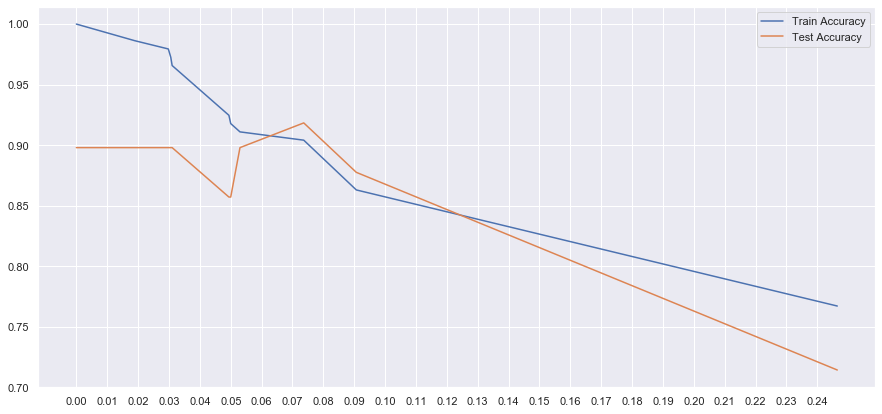%0A)

In \[12\]:

    parameters = {'ccp_alpha':list(np.arange(0.01,0.25,0.01))}

In \[13\]:

    grid_search_tree = GridSearchCV(tree_alpha, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

In \[14\]:

    grid_search_tree.fit(x_train,y_train)
    best_parameters = grid_search_tree.best_params_
    print(best_parameters)

    {'ccp_alpha': 0.02}

In \[15\]:

    best_result = grid_search_tree.best_score_
    print(best_result*100)

    88.41379310344827

In \[16\]:

    pd.DataFrame(grid_search_tree.cv_results_)[['param_ccp_alpha','mean_test_score','rank_test_score']]

Out\[16\]:

|     | param_ccp_alpha | mean_test_score | rank_test_score |
|-----|-----------------|-----------------|-----------------|
| 0   | 0.01            | 0.877241        | 3               |
| 1   | 0.02            | 0.884138        | 1               |
| 2   | 0.03            | 0.884138        | 1               |
| 3   | 0.04            | 0.877241        | 3               |
| 4   | 0.05            | 0.856552        | 5               |
| 5   | 0.06            | 0.828966        | 10              |
| 6   | 0.07            | 0.822529        | 23              |
| 7   | 0.08            | 0.829425        | 9               |
| 8   | 0.09            | 0.836322        | 8               |
| 9   | 0.1             | 0.843218        | 6               |
| 10  | 0.11            | 0.843218        | 6               |
| 11  | 0.12            | 0.822529        | 11              |
| 12  | 0.13            | 0.822529        | 11              |
| 13  | 0.14            | 0.822529        | 11              |
| 14  | 0.15            | 0.822529        | 11              |
| 15  | 0.16            | 0.822529        | 11              |
| 16  | 0.17            | 0.822529        | 11              |
| 17  | 0.18            | 0.822529        | 11              |
| 18  | 0.19            | 0.822529        | 11              |
| 19  | 0.2             | 0.822529        | 11              |
| 20  | 0.21            | 0.822529        | 11              |
| 21  | 0.22            | 0.822529        | 11              |
| 22  | 0.23            | 0.822529        | 11              |
| 23  | 0.24            | 0.794943        | 24              |

#### From train and test accuracy plot and grid search of best parameters, alpha of 0.2 and 0.3 are best parameters to build pruned decision tree.<a href="#From-train-and-test-accuracy-plot-and-grid-search-of-best-parameters,-alpha-of-0.2-and-0.3-are-best-parameters-to-build-pruned-decision-tree." class="anchor-link">¶</a>

### Learning pruned decision tree<a href="#Learning-pruned-decision-tree" class="anchor-link">¶</a>

In \[17\]:

    pruned_tree = DecisionTreeClassifier(ccp_alpha=0.02, criterion = 'entropy', random_state=3)
    pruned_tree.fit(x_train,y_train)
    pruned_tree.score(x_train,y_train)*100

Out\[17\]:

    98.63013698630137

In \[18\]:

    fig = plt.figure(figsize=(50,45))
    dtree = tree.plot_tree(pruned_tree, feature_names=list(x.columns), 
                           class_names=list(map(lambda x: str(x), pruned_tree.classes_)), filled=True)

![](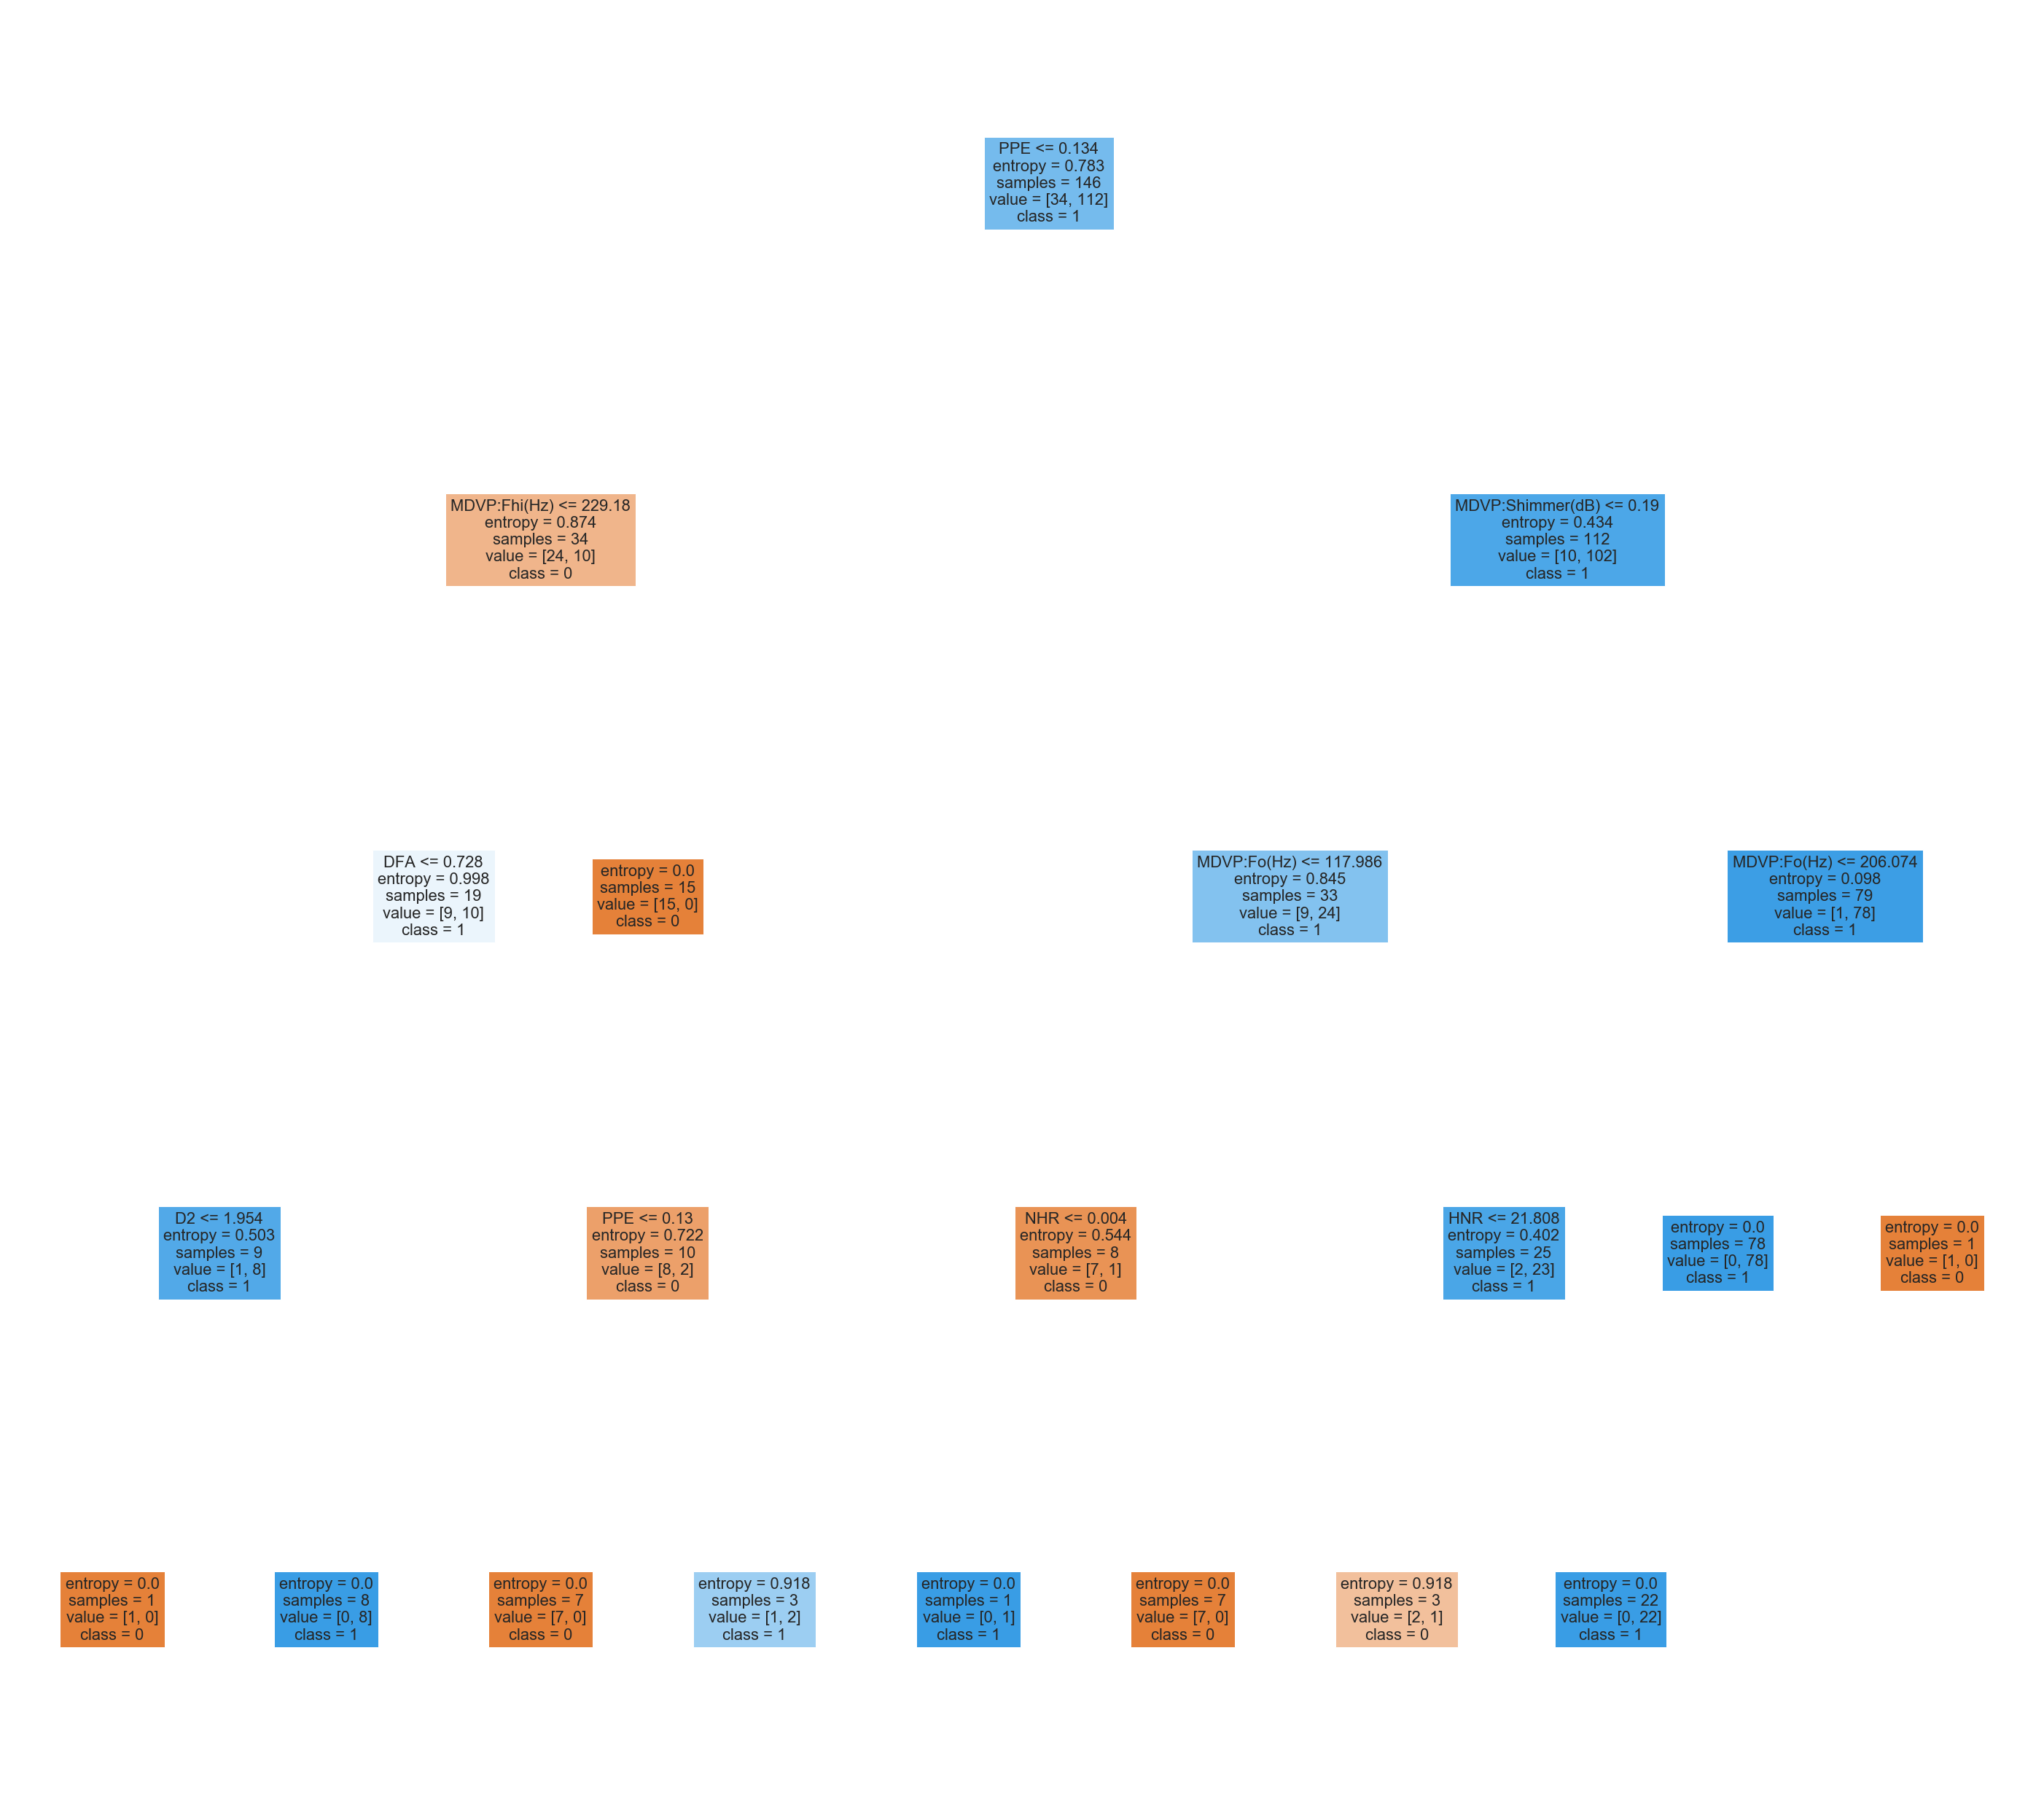%0A)

## Section C<a href="#Section-C" class="anchor-link">¶</a>

### Random Forest Classifier<a href="#Random-Forest-Classifier" class="anchor-link">¶</a>

In \[19\]:

    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators= 1000, criterion='entropy', random_state = 3)
    parameters_rfc = {'max_features' : [4,5,6,7,8]}
    grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=parameters_rfc, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search_rfc.fit(x_train, y_train)
    best_parameters_rfc = grid_search_rfc.best_params_
    print(best_parameters_rfc)

    {'max_features': 6}

In \[20\]:

    pd.DataFrame(grid_search_rfc.cv_results_)[['params','mean_test_score','rank_test_score']]

Out\[20\]:

|     | params              | mean_test_score | rank_test_score |
|-----|---------------------|-----------------|-----------------|
| 0   | {'max_features': 4} | 0.890575        | 3               |
| 1   | {'max_features': 5} | 0.883678        | 5               |
| 2   | {'max_features': 6} | 0.897241        | 1               |
| 3   | {'max_features': 7} | 0.890575        | 3               |
| 4   | {'max_features': 8} | 0.897241        | 1               |

### Training random forest classifier with optimal hyperparameters<a href="#Training-random-forest-classifier-with-optimal-hyperparameters" class="anchor-link">¶</a>

In \[21\]:

    rfc = RandomForestClassifier(n_estimators= 1000, criterion='entropy', max_features=6, random_state = 1)
    rfc.fit(x_train, y_train)
    rfc.score(x_train, y_train)*100

Out\[21\]:

    100.0

### Gradient Boosted Classifier<a href="#Gradient-Boosted-Classifier" class="anchor-link">¶</a>

In \[22\]:

    from sklearn.ensemble import GradientBoostingClassifier
    gbc = GradientBoostingClassifier(n_estimators=1000, random_state=3)
    parameters_gbc = {'max_depth' : [3,4,5,6,7,8,9,10], 'learning_rate':[0.001,0.01,0.1]}
    grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=parameters_gbc, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search_gbc.fit(x_train, y_train)
    best_parameters_gbc = grid_search_gbc.best_params_
    print(best_parameters_gbc)

    {'learning_rate': 0.1, 'max_depth': 3}

In \[23\]:

    pd.DataFrame(grid_search_gbc.cv_results_)[['params','mean_test_score','rank_test_score']]

Out\[23\]:

|     | params                                    | mean_test_score | rank_test_score |
|-----|-------------------------------------------|-----------------|-----------------|
| 0   | {'learning_rate': 0.001, 'max_depth': 3}  | 0.876782        | 6               |
| 1   | {'learning_rate': 0.001, 'max_depth': 4}  | 0.877241        | 4               |
| 2   | {'learning_rate': 0.001, 'max_depth': 5}  | 0.870345        | 7               |
| 3   | {'learning_rate': 0.001, 'max_depth': 6}  | 0.870345        | 7               |
| 4   | {'learning_rate': 0.001, 'max_depth': 7}  | 0.870345        | 7               |
| 5   | {'learning_rate': 0.001, 'max_depth': 8}  | 0.870345        | 7               |
| 6   | {'learning_rate': 0.001, 'max_depth': 9}  | 0.870345        | 7               |
| 7   | {'learning_rate': 0.001, 'max_depth': 10} | 0.870345        | 7               |
| 8   | {'learning_rate': 0.01, 'max_depth': 3}   | 0.877011        | 5               |
| 9   | {'learning_rate': 0.01, 'max_depth': 4}   | 0.884368        | 2               |
| 10  | {'learning_rate': 0.01, 'max_depth': 5}   | 0.863678        | 19              |
| 11  | {'learning_rate': 0.01, 'max_depth': 6}   | 0.863678        | 19              |
| 12  | {'learning_rate': 0.01, 'max_depth': 7}   | 0.863678        | 19              |
| 13  | {'learning_rate': 0.01, 'max_depth': 8}   | 0.863678        | 19              |
| 14  | {'learning_rate': 0.01, 'max_depth': 9}   | 0.863678        | 19              |
| 15  | {'learning_rate': 0.01, 'max_depth': 10}  | 0.863678        | 19              |
| 16  | {'learning_rate': 0.1, 'max_depth': 3}    | 0.890805        | 1               |
| 17  | {'learning_rate': 0.1, 'max_depth': 4}    | 0.884138        | 3               |
| 18  | {'learning_rate': 0.1, 'max_depth': 5}    | 0.870345        | 7               |
| 19  | {'learning_rate': 0.1, 'max_depth': 6}    | 0.870345        | 7               |
| 20  | {'learning_rate': 0.1, 'max_depth': 7}    | 0.870345        | 7               |
| 21  | {'learning_rate': 0.1, 'max_depth': 8}    | 0.870345        | 7               |
| 22  | {'learning_rate': 0.1, 'max_depth': 9}    | 0.870345        | 7               |
| 23  | {'learning_rate': 0.1, 'max_depth': 10}   | 0.870345        | 7               |

### Training boosting classifier with optimal hyperparameters<a href="#Training-boosting-classifier-with-optimal-hyperparameters" class="anchor-link">¶</a>

In \[24\]:

    grad_boost = GradientBoostingClassifier(n_estimators=1000, random_state=1,learning_rate = 0.1, max_depth = 3)
    grad_boost.fit(x_train, y_train)
    grad_boost.score(x_train, y_train)*100

Out\[24\]:

    100.0

### ROC for Gradient Boosted Classifier<a href="#ROC-for-Gradient-Boosted-Classifier" class="anchor-link">¶</a>

In \[25\]:

    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import roc_auc_score

In \[26\]:

    y_train_pred = grad_boost.decision_function(x_train)
    y_test_pred = grad_boost.decision_function(x_test)

In \[27\]:

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    plt.grid()
    plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend()
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    plt.title("AUC(ROC curve) for Gradient Boosting classifier")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.show()

![](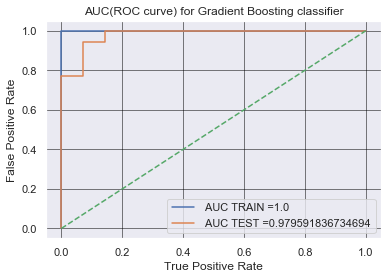%0A)

### ROC for random forest classifier<a href="#ROC-for-random-forest-classifier" class="anchor-link">¶</a>

In \[28\]:

    from sklearn.metrics import plot_roc_curve
    ax = plt.gca()
    rfc_train = plot_roc_curve(rfc, x_train, y_train, ax=ax, alpha=0.8)
    rfc_test = plot_roc_curve(rfc, x_test, y_test, ax=ax, alpha=0.8)
    plt.show()

![](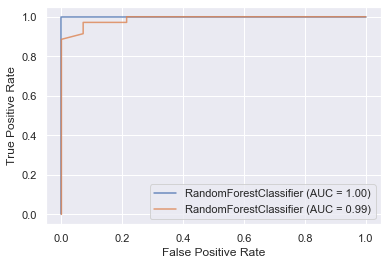%0A)

### ROC for pruned decision tree<a href="#ROC-for-pruned-decision-tree" class="anchor-link">¶</a>

In \[29\]:

    ax = plt.gca()
    tree_train = plot_roc_curve(pruned_tree, x_train, y_train, ax=ax, alpha=0.8)
    tree_test = plot_roc_curve(pruned_tree, x_test, y_test, ax=ax, alpha=0.8)
    plt.show()

![](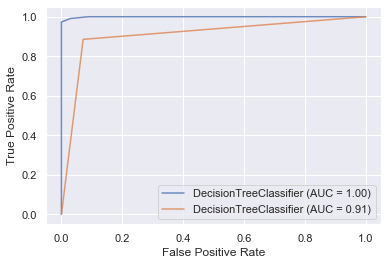%0A)

#### Inference<a href="#Inference" class="anchor-link">¶</a>

ROC for pruned decision tree, Random forest and Gradient boosted
classifier is plotted. On comparing all the above plots, random forest
model performs well on validation sets. The plot line of train and test
error for pruned decision tree is almost same with the difference of 9%

## Section D<a href="#Section-D" class="anchor-link">¶</a>

### Feature Importance Plot by Random forest<a href="#Feature-Importance-Plot-by-Random-forest" class="anchor-link">¶</a>

In \[30\]:

    model = RandomForestClassifier(n_estimators=1000, random_state=1, max_features=6)
    # fit the model
    model.fit(x_train, y_train)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.bar([x for x in list(x.columns)], importance)
    plt.xticks(rotation=90)
    plt.show()

    Feature: 0, Score: 0.11872
    Feature: 1, Score: 0.04645
    Feature: 2, Score: 0.03747
    Feature: 3, Score: 0.02438
    Feature: 4, Score: 0.03388
    Feature: 5, Score: 0.03177
    Feature: 6, Score: 0.02179
    Feature: 7, Score: 0.02904
    Feature: 8, Score: 0.01960
    Feature: 9, Score: 0.02281
    Feature: 10, Score: 0.02590
    Feature: 11, Score: 0.02730
    Feature: 12, Score: 0.03476
    Feature: 13, Score: 0.02671
    Feature: 14, Score: 0.05099
    Feature: 15, Score: 0.02233
    Feature: 16, Score: 0.02855
    Feature: 17, Score: 0.03270
    Feature: 18, Score: 0.11995
    Feature: 19, Score: 0.06598
    Feature: 20, Score: 0.03707
    Feature: 21, Score: 0.14184

![](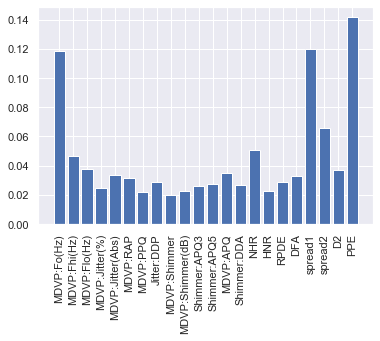%0A)

### Feature Importance Plot by Gradient Boosting<a href="#Feature-Importance-Plot-by-Gradient-Boosting" class="anchor-link">¶</a>

In \[31\]:

    model = GradientBoostingClassifier(n_estimators=1000, random_state=1,learning_rate = 0.1, max_depth = 3)
    # fit the model
    model.fit(x_train, y_train)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.bar([x for x in list(x.columns)], importance)
    plt.xticks(rotation=90)
    plt.show()

    Feature: 0, Score: 0.24313
    Feature: 1, Score: 0.04751
    Feature: 2, Score: 0.00097
    Feature: 3, Score: 0.02780
    Feature: 4, Score: 0.00215
    Feature: 5, Score: 0.00560
    Feature: 6, Score: 0.00129
    Feature: 7, Score: 0.01079
    Feature: 8, Score: 0.00257
    Feature: 9, Score: 0.04749
    Feature: 10, Score: 0.01439
    Feature: 11, Score: 0.00842
    Feature: 12, Score: 0.00083
    Feature: 13, Score: 0.00515
    Feature: 14, Score: 0.00469
    Feature: 15, Score: 0.00531
    Feature: 16, Score: 0.04136
    Feature: 17, Score: 0.03529
    Feature: 18, Score: 0.06339
    Feature: 19, Score: 0.03715
    Feature: 20, Score: 0.03324
    Feature: 21, Score: 0.36148

![](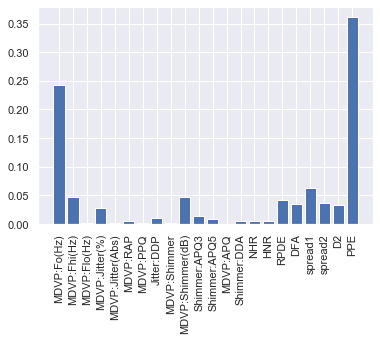%0A)

### Partial Dependence Plot of Random forest classifier<a href="#Partial-Dependence-Plot-of-Random-forest-classifier" class="anchor-link">¶</a>

In \[77\]:

    from sklearn.inspection import plot_partial_dependence
    est1 = RandomForestClassifier(n_estimators=1000, random_state=1, max_features=6).fit(x_train,y_train)
    disp1 = plot_partial_dependence(est1, x_train,['PPE'])

![](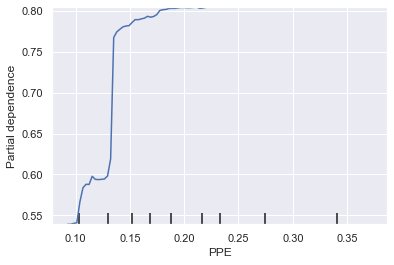%0A)

### Partial Dependence Plot of Gradient Boosted classifier<a href="#Partial-Dependence-Plot-of-Gradient-Boosted-classifier" class="anchor-link">¶</a>

In \[71\]:

    est2 = GradientBoostingClassifier(n_estimators=1000, random_state=1,learning_rate = 0.1, max_depth = 3).fit(x_train,y_train)
    disp2 = plot_partial_dependence(est2, x_train,['PPE'])

![](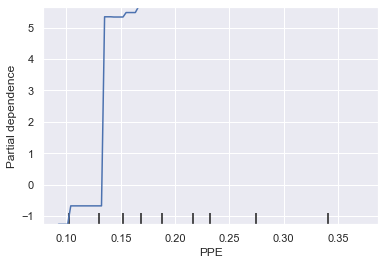%0A)

#### Inference<a href="#Inference" class="anchor-link">¶</a>

In partial dependence plot of feature 'PPE', the proportionality
increases drastically at the value of 0.125 in both random forest and
gradient boosting model. The line plot of gradient boosting classifier
is more like impulses wave, whereas random forest model gives curved
plot with some spikes at some PPE values.

In \[ \]: